In [ ]:
a=[]
for i in range(0,len(ht)):a.append(round(data.range[ht[i][0]].values/1000))
height=np.array(a)


fig,ax1=plt.subplots(2,5)


for t in range(1,len(input_data)+1):
    fn=input_data[t]
    dataset = xr.open_dataset(fn)
    data = process_spectra(dataset,'o')
    a=[]
    for i in range(0,len(required_alt)):
        ht[i]=np.where(abs((data.range.values/1000)-required_alt[i])<0.2)[0]
        a.append(round(data.range[ht[i][0]].values/1000))
    height=np.array(a)
        
    for r in range(0,len(ht)):
        
        ax=plt.subplot(2,5,t)
        if t==1:
            plt.plot(data.doppler.values,10*np.log10(data.SPCco_cal[1,ht[r][0],:]).values.transpose(),lw=1.5)
        else:
            plt.plot(data.doppler.values,10*np.log10(data.SPCco_cal[0::100,ht[r][0],:]).values.transpose(),lw=1.5)
        
        ax.minorticks_on()
        ax.tick_params('both', length=5, width=1.6, which='major')
        ax.tick_params('both', length=3, width=1, which='minor')
        ax.xaxis.set_major_locator(MultipleLocator(5))
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.yaxis.set_major_locator(MultipleLocator(5))
        ax.yaxis.set_minor_locator(MultipleLocator(1))
        for axis in ['top','bottom','left','right']:ax.spines[axis].set_linewidth(0.8)
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_font(font_props)
        ax.yaxis.set_tick_params(labelleft=False)	
        ax.xaxis.set_tick_params(labelleft=False)
        if t in np.arange(1,10,5):
            ax.yaxis.set_tick_params(labelleft=True,labelsize=8)
        if t in np.arange(10-5+1,10+1):
            ax.xaxis.set_tick_params(labelleft=True,labelsize=8)
        plt.title(fn[-8:-4],fontsize = 5,fontweight='bold',x=0.5,y=1.2, pad=-14)

In [ ]:
a=[]
for i in range(0,len(ht)):a.append(round(data.range[ht[i][0]].values/1000))
height=np.array(a)


fig,ax1=plt.subplots(2,5)

for r in range(0,len(ht)):
    for t in range(1,len(input_data)+1):
        fn=input_data[t]
        dataset = xr.open_dataset(fn)
        data = process_spectra(dataset,'o')
        a=[]
        required_alt=np.arange(0,11)
        ht = np.empty(len(required_alt), dtype=object)
        for i in range(0,len(required_alt)):
            ht[i]=np.where(abs((data.range.values/1000)-required_alt[i])<0.2)[0]
            a.append(round(data.range[ht[i][0]].values/1000))
        height=np.array(a)
        

        
        ax=plt.subplot(2,5,t)
        if t==1:
            plt.plot(data.doppler.values,10*np.log10(data.SPCco_cal[1,ht[r][0],:]).values.transpose(),lw=1.5)
        else:
            plt.plot(data.doppler.values,10*np.log10(data.SPCco_cal[0::100,ht[r][0],:]).values.transpose(),lw=1.5)
        
        ax.minorticks_on()
        ax.tick_params('both', length=5, width=1.6, which='major')
        ax.tick_params('both', length=3, width=1, which='minor')
        ax.xaxis.set_major_locator(MultipleLocator(5))
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.yaxis.set_major_locator(MultipleLocator(5))
        ax.yaxis.set_minor_locator(MultipleLocator(1))
        for axis in ['top','bottom','left','right']:ax.spines[axis].set_linewidth(0.8)
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_font(font_props)
        ax.yaxis.set_tick_params(labelleft=False)	
        ax.xaxis.set_tick_params(labelleft=False)
        if t in np.arange(1,10,5):
            ax.yaxis.set_tick_params(labelleft=True,labelsize=8)
        if t in np.arange(10-5+1,10+1):
            ax.xaxis.set_tick_params(labelleft=True,labelsize=8)
        plt.title(fn[-8:-4],fontsize = 5,fontweight='bold',x=0.5,y=1.2, pad=-14)

In [ ]:
    font_props = {'family' : 'times new roman',
                          'weight' : 'bold',
                          'size'   : 8}
    fn=input_data[0]
    dataset = xr.open_dataset(fn)
    data = process_spectra(dataset,'o')
    required_alt=np.arange(0,11)
    ht = np.empty(len(required_alt), dtype=object)

    for i in range(0,len(required_alt)):ht[i]=np.where(abs((data.range.values/1000)-required_alt[i])<0.2)[0]

    fig,ax1=plt.subplots(2,5)

    for r in range(1,len(ht)):

        ax=plt.subplot(2,5,r)

        SPC_F = np.empty([len(input_data),len(data.doppler)], dtype=object)
        for t in range(1,len(input_data)+1):
            fn=input_data[t-1]
            dataset = xr.open_dataset(fn)
            data = process_spectra(dataset,'o')
            SPC_F[t-1,:]=10*np.log10(data.SPCco_cal[1,ht[r][0],:]).values.transpose()

        a=[]
        for i in range(0,len(input_data)):a.append(input_data[i][-8:-4])
        LABEL=np.array(a)

        ax1[0,0].annotate('Spectrogram on '+fn[-17:-9], xy=(0.35,0.9), xycoords='figure fraction',fontsize=8,fontweight='bold')
        if r==1:
            plt.plot([], [], ' ', label="hr")
            ax.plot(data.doppler.values,SPC_F[::2].transpose(),lw=1.5,label=LABEL[::2])
            ax.legend(prop={'weight':'bold'},fontsize="10")
        else:
            ax.plot(data.doppler.values,SPC_F[::2].transpose(),lw=1.5)
        plt.ylim(-60,20)
        plt.xlim(-10.58,10.66)
        ax.minorticks_on()
        ax.tick_params('both', length=5, width=1.6, which='major')
        ax.tick_params('both', length=3, width=1, which='minor')
        ax.xaxis.set_major_locator(MultipleLocator(5))
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.yaxis.set_major_locator(MultipleLocator(10))
        ax.yaxis.set_minor_locator(MultipleLocator(5))
        for axis in ['top','bottom','left','right']:ax.spines[axis].set_linewidth(0.8)
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_font(font_props)
        ax.yaxis.set_tick_params(labelleft=False)
        ax.xaxis.set_tick_params(labelleft=False)
        if t in np.arange(10-5+1,10+1):
            ax.xaxis.set_tick_params(labelleft=True,labelsize=8)
        if t in np.arange(1,10,5):
            ax.yaxis.set_tick_params(labelleft=True,labelsize=8)
        plt.title(str(ht[r][0])+' km',fontsize = 5,fontweight='bold',x=0.5,y=1.2, pad=-14)
    plt.show()


In [ ]:
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import os.path
import xarray as xr
import glob
from Process_Spectra import process_spectra
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
required_alt=np.arange(0,10)


monthly_files=sorted( [d for d in os.listdir('/project/meteo/data/miraMACS/mom/2023/09/') if os.path.isdir(os.path.join('/project/meteo/data/miraMACS/mom/2023/09/', d))])


monthly_files_F=[]

for i in range(0,len(monthly_files)):monthly_files_F.append(os.path.join('/project/meteo/data/miraMACS/mom/2023/09/',str(monthly_files[i])))




#for fn in monthly_files:
#	folder_name=fn[-10:-6]+fn[-5:-3]+fn[-2:]
#	os.mkdir('Spectra Quick Looks/'+str(folder_name))

    
    
for fn1 in monthly_files_F[17:18]:
    input_data=sorted(glob.glob(fn1+'/????????_??00.znc'))


    font_props = {'family' : 'times new roman',
                          'weight' : 'bold',
                          'size'   : 8}
    fn=input_data[0]
    dataset = xr.open_dataset(fn)
    data = process_spectra(dataset,'o')
    required_alt=np.arange(0,11)
    ht = np.empty(len(required_alt), dtype=object)

    for i in range(0,len(required_alt)):ht[i]=np.where(abs((data.range.values/1000)-required_alt[i])<0.2)[0]

    fig,ax1=plt.subplots(2,5)

    for r in range(1,len(ht)):

        ax=plt.subplot(2,5,r)

        SPC_F = np.empty([len(input_data),len(data.doppler)], dtype=object)
        for t in range(1,len(input_data)+1):
            fn=input_data[t-1]
            dataset = xr.open_dataset(fn)
            data = process_spectra(dataset,'o')
            SPC_F[t-1,:]=10*np.log10(data.SPCco_cal[1,ht[r][0],:]).values.transpose()

        a=[]
        for i in range(0,len(input_data)):a.append(input_data[i][-8:-4])
        LABEL=np.array(a)

        ax1[0,0].annotate('Spectrogram on '+fn[-17:-9], xy=(0.35,0.9), xycoords='figure fraction',fontsize=8,fontweight='bold')
        if r==1:
            plt.plot([], [], ' ', label="hr")
            ax.plot(data.doppler.values,SPC_F[::2].transpose(),lw=1.5,label=LABEL[::2])
            ax.legend(prop={'weight':'bold'},fontsize="5")
            plt.ylabel('Z$_e$',fontsize=12,fontweight='bold')
        else:
            ax.plot(data.doppler.values,SPC_F[::2].transpose(),lw=1.5)
        plt.ylim(-60,20)
        plt.xlim(-10.58,10.66)
        ax.minorticks_on()
        ax.tick_params('both', length=5, width=1.6, which='major')
        ax.tick_params('both', length=3, width=1, which='minor')
        ax.xaxis.set_major_locator(MultipleLocator(5))
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.yaxis.set_major_locator(MultipleLocator(10))
        ax.yaxis.set_minor_locator(MultipleLocator(5))
        for axis in ['top','bottom','left','right']:ax.spines[axis].set_linewidth(0.8)
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_font(font_props)
        ax.yaxis.set_tick_params(labelleft=False)
        ax.xaxis.set_tick_params(labelleft=False)
        if r in np.arange(10-5+1,10+1):
            ax.xaxis.set_tick_params(labelleft=True,labelsize=8)
        if r in np.arange(1,10,5):
            ax.yaxis.set_tick_params(labelleft=True,labelsize=8)
        plt.title(str(round(data.range[ht[r][0]].values/1000))+' km',fontsize = 5,fontweight='bold',x=0.5,y=1.2, pad=-14)
        if r == 8:plt.xlabel('Doppler',fontsize=12,fontweight='bold')
        
    my_file=('mira_2D_spectra_QuickLooks_Hourly_'+fn[-17:-9]+'.png')
    my_path=os.path.abspath(fn[-17:-9])
    plt.savefig(os.path.join(my_path, my_file),bbox_inches='tight',dpi=500)
    #print(fn[-17:-4])
    plt.show()


In [ ]:
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import glob
from netCDF4 import Dataset
fn1='/project/meteo/data/miraMACS/mom/2023/10/13'
input_data=sorted(glob.glob(fn1+'/????????_??00.mmclx'))
from pylab import get_current_fig_manager


index=count()

z=[]


def animate_Z(i):
    fn=input_data[next(index)]
    ds = Dataset(fn)
    z.append(ds.variables['Ze'][:].data)
    z1=np. concatenate(z)
    Z=10*np.log10(np. concatenate(z))
    plt.cla()
    time=np.arange(0,len(z1))
    time1=(time*np.ones((z1.shape[1],z1.shape[0])))
    ht=ds.variables['range'][:].data
    ht1=(ht*np.ones((z1.shape[0],z1.shape[1])))

    ax=plt.subplot(3,1,1)
    pc=plt.pcolor(time1.transpose(),ht1/1000,Z,cmap='jet',vmin=-60,vmax=20)
    del Z,ds,fn
    for axis in ['top','bottom','left','right']:ax.spines[axis].set_linewidth(2)
    ax.minorticks_on()
    ax.tick_params('both', length=8, width=1.6, which='major')
    ax.tick_params('both', length=5, width=1, which='minor')
    plt.ylabel('Altitude (km))',fontsize=12,fontweight='bold')
    plt.xlabel('Time',fontsize=12,fontweight='bold')
    plt.xticks(fontsize = 12,fontweight='bold')
    plt.yticks(fontsize = 12,fontweight='bold')
    cbaxes1=fig.add_axes([0.93, 0.1, 0.01, 0.3])
    cb1=plt.colorbar(pc, cax = cbaxes1)
    cb1.ax.tick_params(labelsize=5)
    axcb = cb1.ax
    axcb.text(0.01,21.5,'a.u (dB)',rotation=0,fontsize=8,fontweight='bold')
    axcb.tick_params(length=3, width=1.6, which='major')
    axcb.tick_params(length=1, width=1, which='minor')





def animate_V(i):
    fn=input_data[next(index)]
    ds = Dataset(fn)
    z.append(ds.variables['VELe'][:].data)
    z1=np. concatenate(z)
    Z=10*np.log10(np. concatenate(z))
    plt.cla()
    time=np.arange(0,len(z1))
    time1=(time*np.ones((z1.shape[1],z1.shape[0])))
    ht=ds.variables['range'][:].data
    ht1=(ht*np.ones((z1.shape[0],z1.shape[1])))

    ax=plt.subplot(3,1,2)
    pc=plt.pcolor(time1.transpose(),ht1/1000,Z,cmap='jet',vmin=3,vmax=-10)
    del Z,ds,fn
    for axis in ['top','bottom','left','right']:ax.spines[axis].set_linewidth(2)
    ax.minorticks_on()
    ax.tick_params('both', length=8, width=1.6, which='major')
    ax.tick_params('both', length=5, width=1, which='minor')
    plt.ylabel('Altitude (km))',fontsize=12,fontweight='bold')
    plt.xlabel('Time',fontsize=12,fontweight='bold')
    plt.xticks(fontsize = 12,fontweight='bold')
    plt.yticks(fontsize = 12,fontweight='bold')
    cbaxes1=fig.add_axes([0.93, 0.1, 0.01, 0.3])
    cb1=plt.colorbar(pc, cax = cbaxes1)
    cb1.ax.tick_params(labelsize=5)
    axcb = cb1.ax
    axcb.text(0.01,21.5,'a.u (dB)',rotation=0,fontsize=8,fontweight='bold')
    axcb.tick_params(length=3, width=1.6, which='major')
    axcb.tick_params(length=1, width=1, which='minor')
#ax1[0,0].annotate('Doppler velocity (m s$^{-1}$)',xy=(0.37,.03), xycoords='figure fraction',fontsize=8,fontweight='bold')

fig, ax = plt.subplots(figsize=(10,8))	
thismanager = get_current_fig_manager()
thismanager.window.wm_geometry("5000x5000+0+0")

#plt.title('Moments on '+str(np.round(data.range[r].values/1000,2))+'km',fontsize = 18)


ani=FuncAnimation(plt.gcf(),animate_Z,interval=1000) 

	
plt.tight_layout()
plt.show()

AttributeError: 'FigureManagerBase' object has no attribute 'window'

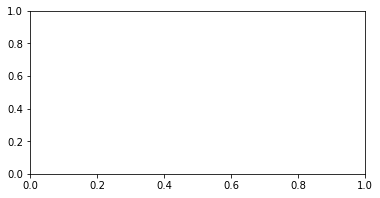

In [1]:
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import glob
from netCDF4 import Dataset
from pylab import get_current_fig_manager
import time as time_app
from datetime import date
today = date.today()

#fn1='/project/meteo/data/miraMACS/mom/2023/10/13'
d1 = today.strftime("%d/%m/%Y")
fn1='/project/meteo/data/miraMACS/mom/2023/'+d1[3:5]+'/'+d1[0:2]
input_data=sorted(glob.glob(fn1+'/????????_??00.mmclx'))

index=count()

z=[]
v=[]
sw=[]
ldr=[]
xtick=[]
xticklabels=[]

def animate(i):
    fn=input_data[next(index)]
    ds = Dataset(fn)
    z.append(ds.variables['Ze'][:].data)
    z1=np. concatenate(z)
    Z=10*np.log10(np. concatenate(z))
    v.append(ds.variables['VEL'][:].data)
    V=np. concatenate(v)
    sw.append(ds.variables['RMS'][:].data)
    SW=np. concatenate(sw)
    ldr.append(ds.variables['LDR'][:].data)
    LDR=np. concatenate(ldr)
    xticklabels.append(fn[-10:-6])
    xtick.append(len(z1))

    #plt.cla()
    time=np.arange(0,len(z1))
    time1=(time*np.ones((z1.shape[1],z1.shape[0])))
    ht=ds.variables['range'][:].data
    ht1=(ht*np.ones((z1.shape[0],z1.shape[1])))

    
    
    ax=plt.subplot(4,1,1)
    pc=plt.pcolor(time1.transpose(),ht1/1000,Z,cmap='jet',vmin=-60,vmax=20)
    del Z,ds
    ax.set_position([0.05,0.76, 0.88, 0.19])
    ax.set_xticks(xtick)
    

    for axis in ['top','bottom','left','right']:ax.spines[axis].set_linewidth(2)
    ax.minorticks_on()
    ax.tick_params('both', length=8, width=1.6, which='major')
    ax.tick_params('both', length=5, width=1, which='minor')
    plt.title('Moments on '+fn[-19:-11],fontsize=18,fontweight='bold')
    #ax.annotate('Moments on '+fn[-19:-5],xy=(.35,0.9), xycoords='figure fraction',fontsize=18,fontweight='bold')
    del fn
    ax.annotate('Height above ground (km)',xy=(.001,0.4), xycoords='figure fraction',fontsize=18,fontweight='bold',rotation='vertical')
    #plt.xlabel('Time',fontsize=12,fontweight='bold')
    plt.xticks(fontsize = 12,fontweight='bold')
    plt.yticks(fontsize = 12,fontweight='bold')
    plt.ylim(0,10)
    
    cbaxes1=fig.add_axes([0.95, 0.76, 0.01, 0.17])
    cb1=plt.colorbar(pc, cax = cbaxes1)
    #cb1 = fig.colorbar(pc, ax=ax)
    ticklabs = cb1.ax.get_yticklabels()
    cb1.ax.set_yticklabels(ticklabs, fontsize=10,fontweight='bold')
    axcb = cb1.ax
    axcb.tick_params(length=3, width=1.6, which='major')
    axcb.text(0.05,23,'Z$_e$(dBZ$_e$)',rotation=0,fontsize=12,fontweight='bold')
    axcb.tick_params(length=1, width=1, which='minor')
    ax.xaxis.set_tick_params(labelleft=False)
    #time_app.sleep(15)
    
    
#velocity plot


    ax=plt.subplot(4,1,2)
    pc=plt.pcolor(time1.transpose(),ht1/1000,V,cmap='jet',vmin=3,vmax=-10)
    ax.set_position([0.05,0.54, 0.88, 0.19])
    ax.set_xticks(xtick)
    
    del V
    for axis in ['top','bottom','left','right']:ax.spines[axis].set_linewidth(2)
    ax.minorticks_on()
    ax.tick_params('both', length=8, width=1.6, which='major')
    ax.tick_params('both', length=5, width=1, which='minor')
    #lt.ylabel('Height above ground (km)',fontsize=12,fontweight='bold')
    #plt.xlabel('Time',fontsize=12,fontweight='bold')
    plt.xticks(fontsize = 12,fontweight='bold')
    plt.yticks(fontsize = 12,fontweight='bold')
    plt.ylim(0,10)
    cbaxes1=fig.add_axes([0.95, 0.54, 0.01, 0.17])
    cb1=plt.colorbar(pc, cax = cbaxes1)
    #cb1 = fig.colorbar(pc, ax=ax)
    ticklabs = cb1.ax.get_yticklabels()
    cb1.ax.set_yticklabels(ticklabs, fontsize=10,fontweight='bold')
    #cb1.ax.tick_params(labelsize=10)
    axcb = cb1.ax
    axcb.text(0.01,3.15,'Vel(ms$^{-1}$)',rotation=0,fontsize=12,fontweight='bold')
    axcb.tick_params(length=3, width=1.6, which='major')
    axcb.tick_params(length=1, width=1, which='minor')
#ax1[0,0].annotate('Doppler velocity (m s$^{-1}$)',xy=(0.37,.03), xycoords='figure fraction',fontsize=8,fontweight='bold')
    ax.xaxis.set_tick_params(labelleft=False)
    plt.rcParams['xtick.top'] = True
    
    
#spectral width plot


    ax=plt.subplot(4,1,3)
    pc=plt.pcolor(time1.transpose(),ht1/1000,SW,cmap='jet',vmin=0,vmax=0.5)
    ax.set_position([0.05,0.32, 0.88, 0.19])
    ax.set_xticks(xtick)
    
    
    del SW
    for axis in ['top','bottom','left','right']:ax.spines[axis].set_linewidth(2)
    ax.minorticks_on()
    ax.tick_params('both', length=8, width=1.6, which='major')
    ax.tick_params('both', length=5, width=1, which='minor')
    
    #plt.xlabel('Time',fontsize=12,fontweight='bold')
    plt.xticks(fontsize = 12,fontweight='bold')
    plt.yticks(fontsize = 12,fontweight='bold')
    plt.ylim(0,10)
    cbaxes1=fig.add_axes([0.95, 0.32, 0.01, 0.17])
    cb1=plt.colorbar(pc, cax = cbaxes1)
    #cb1 = fig.colorbar(pc, ax=ax)
    ticklabs = cb1.ax.get_yticklabels()
    cb1.ax.set_yticklabels(ticklabs, fontsize=10,fontweight='bold')
    #cb1.ax.tick_params(labelsize=10)
    axcb = cb1.ax
    axcb.text(0.01,0.55,'SW(ms$^{-1}$)',rotation=0,fontsize=12,fontweight='bold')
    axcb.tick_params(length=3, width=1.6, which='major')
    axcb.tick_params(length=1, width=1, which='minor')
    ax.xaxis.set_tick_params(labelleft=False)
    plt.rcParams['xtick.top'] = True
    
#LDR

    ax=plt.subplot(4,1,4)
    pc=plt.pcolor(time1.transpose(),ht1/1000,LDR,cmap='jet',vmin=-50,vmax=0)
    ax.set_position([0.05,0.1, 0.88, 0.19])
    ax.set_xticks(xtick)
    ax.set_xticklabels(xticklabels)
    
    del LDR
    for axis in ['top','bottom','left','right']:ax.spines[axis].set_linewidth(2)
    ax.minorticks_on()
    ax.tick_params('both', length=8, width=1.6, which='major')
    ax.tick_params('both', length=5, width=1, which='minor')
    
    plt.xlabel('Time (hhmm)',fontsize=12,fontweight='bold')
    plt.xticks(fontsize = 12,fontweight='bold')
    plt.yticks(fontsize = 12,fontweight='bold')
    plt.ylim(0,10)
    cbaxes1=fig.add_axes([0.95, 0.1, 0.01, 0.17])
    cb1=plt.colorbar(pc, cax = cbaxes1)
    #b1 = fig.colorbar(pc, ax=ax)
    ticklabs = cb1.ax.get_yticklabels()
    cb1.ax.set_yticklabels(ticklabs, fontsize=10,fontweight='bold')
    #cb1.ax.tick_params(labelsize=10)
    axcb = cb1.ax
    axcb.text(0.01,1.05,'LDR(dB)',rotation=0,fontsize=12,fontweight='bold')
    axcb.tick_params(length=3, width=1.6, which='major')
    axcb.tick_params(length=1, width=1, which='minor')
    ax.xaxis.set_tick_params(labelleft=True,labelsize=12)
    plt.rcParams['xtick.top'] = True
    
    
    
fig, ax = plt.subplots(figsize=(6,4))	
thismanager = get_current_fig_manager()
thismanager.window.wm_geometry("5000x5000+0+0")

#plt.title('Moments on '+str(np.round(data.range[r].values/1000,2))+'km',fontsize = 18)
ani=FuncAnimation(plt.gcf(),animate,interval=60000) 


	
plt.tight_layout()
plt.show()
